In [1]:
import os
import numpy as np
import pandas as pd
from scipy import signal as sig
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr

c:\Users\Alli Ajagbe\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
ddir = os.path.join('.','precipitation')
pr = xr.open_mfdataset(f'{ddir}/*.nc')
print(f'pr: {pr}')

pr: <xarray.Dataset>
Dimensions:  (time: 1428, lon: 144, lat: 72)
Coordinates:
  * time     (time) datetime64[ns] 1901-01-01 1901-02-01 ... 2019-12-01
  * lon      (lon) float32 -178.8 -176.2 -173.8 -171.2 ... 173.8 176.2 178.8
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(12, 72, 144), meta=np.ndarray>
Attributes: (12/23)
    CDI:                        Climate Data Interface version 1.9.10 (https:...
    source:                     Run ID = 2004151855. Data generated from:pre....
    institution:                KNMI Climate Explorer and Data held at Britis...
    Conventions:                CF-1.0
    title:                      CRU TS4.04 Precipitation  averaged over  5x 5...
    cdi:                        Climate Data Interface version 1.9.8 (https:/...
    ...                         ...
    geospatial_lon_resolution:  2.5
    climexp_url:                https://climexp.knmi

In [3]:
print(f'Dimensions: {pr.dims}')

Dimensions: Frozen({'time': 1428, 'lon': 144, 'lat': 72})


In [4]:
print(f'Attributes: {pr.attrs}')

Attributes: {'CDI': 'Climate Data Interface version 1.9.10 (https://mpimet.mpg.de/cdi)', 'source': 'Run ID = 2004151855. Data generated from:pre.2004011744.dtb', 'institution': 'KNMI Climate Explorer and Data held at British Atmospheric Data Centre, RAL, UK.', 'Conventions': 'CF-1.0', 'title': 'CRU TS4.04 Precipitation  averaged over  5x 5 grid boxes', 'cdi': 'Climate Data Interface version 1.9.8 (https://mpimet.mpg.de/cdi)', 'references': 'Information on the data is available at http://badc.nerc.ac.uk/data/cru/', 'comment': 'Access to these data is available to any registered CEDA user.', 'contact': 'support@ceda.ac.uk', 'cdo': 'Climate Data Operators version 1.9.8 (https://mpimet.mpg.de/cdo)', 'geospatial_lat_min': -90.0, 'geospatial_lat_max': 90.0, 'geospatial_lat_units': 'degrees_north', 'geospatial_lon_min': -180.0, 'geospatial_lon_max': 180.0, 'geospatial_lon_units': 'degrees_east', 'geospatial_lat_resolution': 2.5, 'geospatial_lon_resolution': 2.5, 'climexp_url': 'https://climex

In [5]:
pr_location = pr.sel(lat=31.25, lon=76.25)
print(f'pr_location: {pr_location}')

pr_location: <xarray.Dataset>
Dimensions:  (time: 1428)
Coordinates:
  * time     (time) datetime64[ns] 1901-01-01 1901-02-01 ... 2019-12-01
    lon      float32 76.25
    lat      float32 31.25
Data variables:
    pr       (time) float32 dask.array<chunksize=(12,), meta=np.ndarray>
Attributes: (12/23)
    CDI:                        Climate Data Interface version 1.9.10 (https:...
    source:                     Run ID = 2004151855. Data generated from:pre....
    institution:                KNMI Climate Explorer and Data held at Britis...
    Conventions:                CF-1.0
    title:                      CRU TS4.04 Precipitation  averaged over  5x 5...
    cdi:                        Climate Data Interface version 1.9.8 (https:/...
    ...                         ...
    geospatial_lon_resolution:  2.5
    climexp_url:                https://climexp.knmi.nl/select.cgi?cru4_pre
    time_coverage_start:        1901-01-01 00:00:00
    time_coverage_end:          2019-12-01 00:00:00


In [6]:
ddir = os.path.join('.','temperature')
tasmax = xr.open_mfdataset(f'{ddir}/*.nc')

In [7]:
tasmax_location = tasmax.sel(lat=31.25, lon=76.25)
tasmax_location.to_array()
tasmax_location = tasmax_location.rename({'tasmax':'temp'})

In [8]:
tasmax_location.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:  (time: 1428)
Coordinates:
  * time     (time) datetime64[ns] 1901-01-01 1901-02-01 ... 2019-12-01
    lon      float32 76.25
    lat      float32 31.25
Data variables:
    temp     (time) float32 dask.array<chunksize=(12,), meta=np.ndarray>
Attributes: (12/23)
    CDI:                        Climate Data Interface version 1.9.10 (https:...
    source:                     Run ID = 2004151855. Data generated from:TMX ...
    institution:                KNMI Climate Explorer and Data held at Britis...
    Conventions:                CF-1.0
    title:                      CRU TS4.04 Maximum Temperature  averaged over...
    cdi:                        Climate Data Interface version 1.9.8 (https:/...
    ...                         ...
    geospatial_lon_resolution:  2.5
    climexp_url:                https://climexp.knmi.nl/select.cgi?cru4_tmx
    time_coverage_start:        1901-01-01 00:00:00
    time_coverage_end:          2

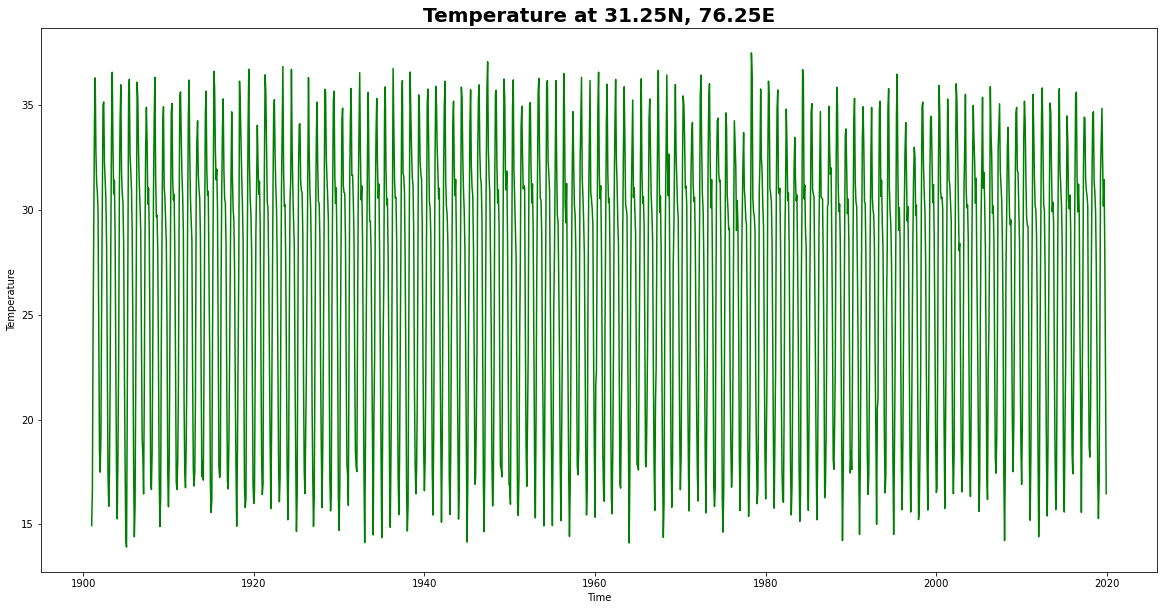

In [9]:
plt.close('all')
plt.figure(figsize=(20,10))
plt.plot(tasmax_location.time, tasmax_location.temp.values,'g')
plt.title('Temperature at 31.25N, 76.25E', fontsize=20, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

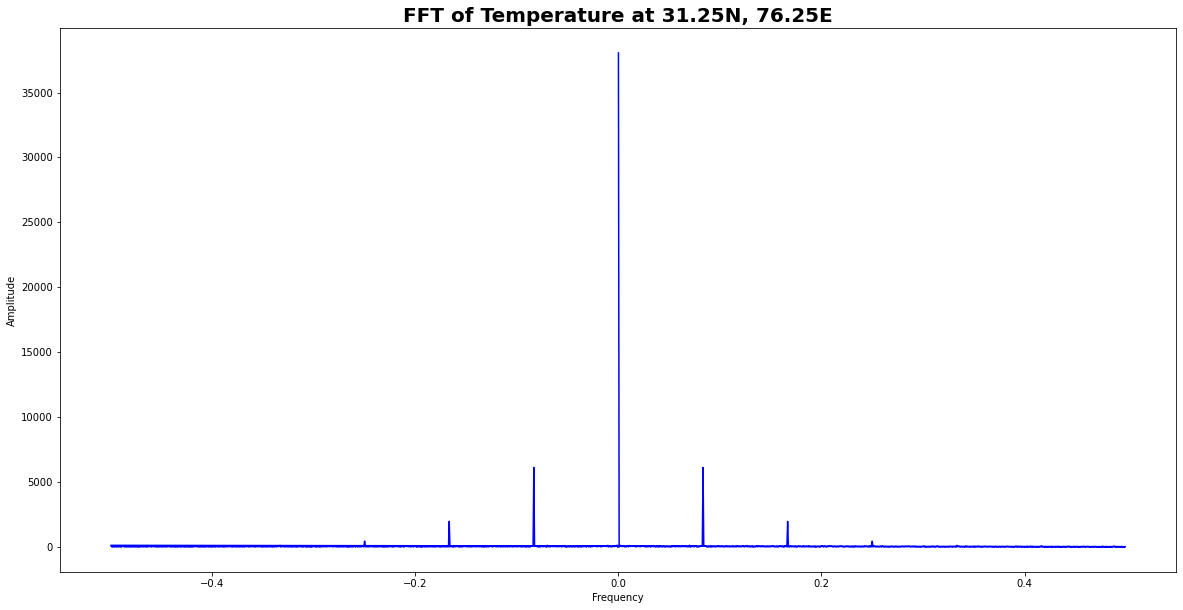

In [10]:
tmp_fft = np.fft.fft(tasmax_location.temp.values)
freq = np.fft.fftfreq(tasmax_location.temp.values.shape[0], d=1)
plt.close('all')
plt.figure(figsize=(20,10))
plt.plot(freq, np.abs(tmp_fft), 'b')
plt.title('FFT of Temperature at 31.25N, 76.25E', fontsize=20, fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

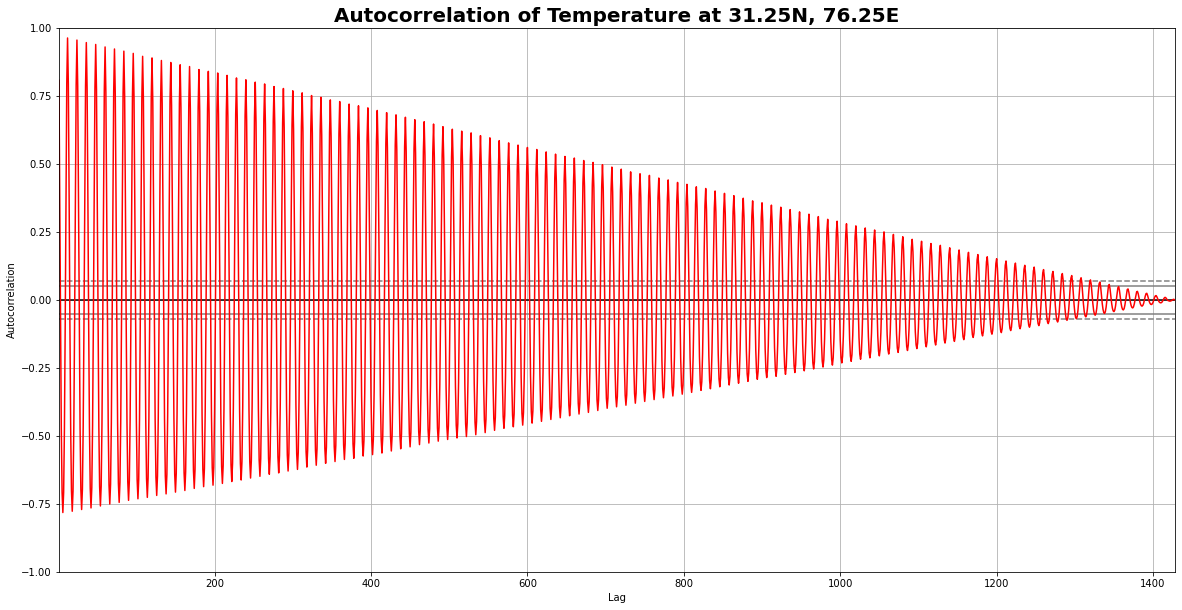

In [11]:
plt.close('all')
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(tasmax_location.temp.values, color='r')
plt.title('Autocorrelation of Temperature at 31.25N, 76.25E', fontsize=20, fontweight='bold')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

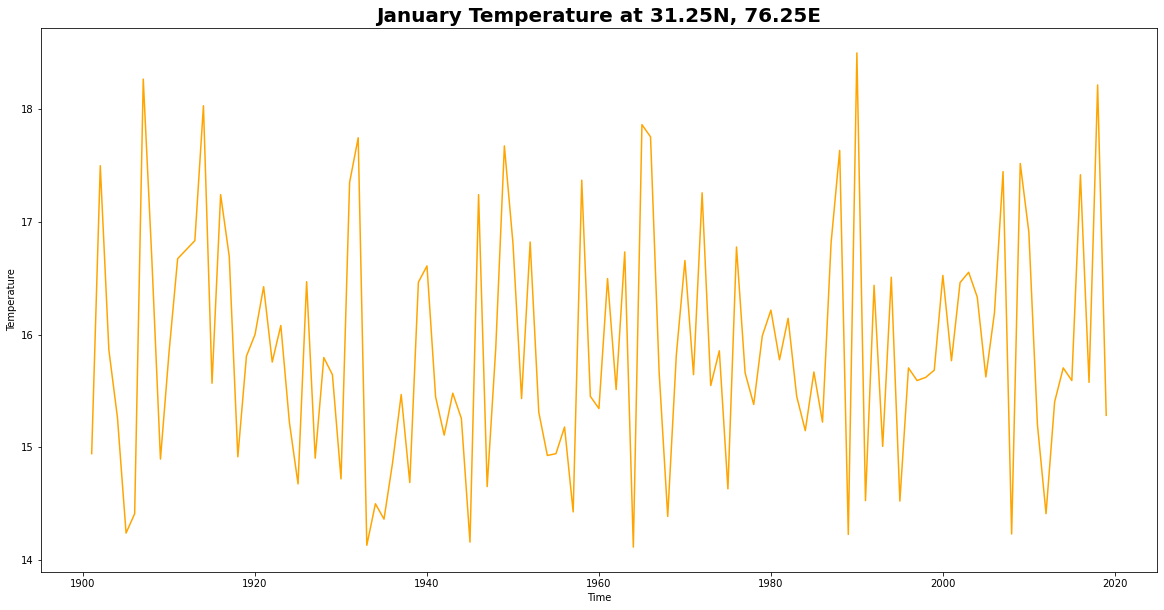

In [12]:
# plotting just january temperature for each year
january_data = tasmax_location.sel(time=tasmax_location.time.dt.month==1)
plt.close('all')
plt.figure(figsize=(20,10))
plt.plot(january_data.time, january_data.temp.values,'orange')
plt.title('January Temperature at 31.25N, 76.25E', fontsize=20, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()


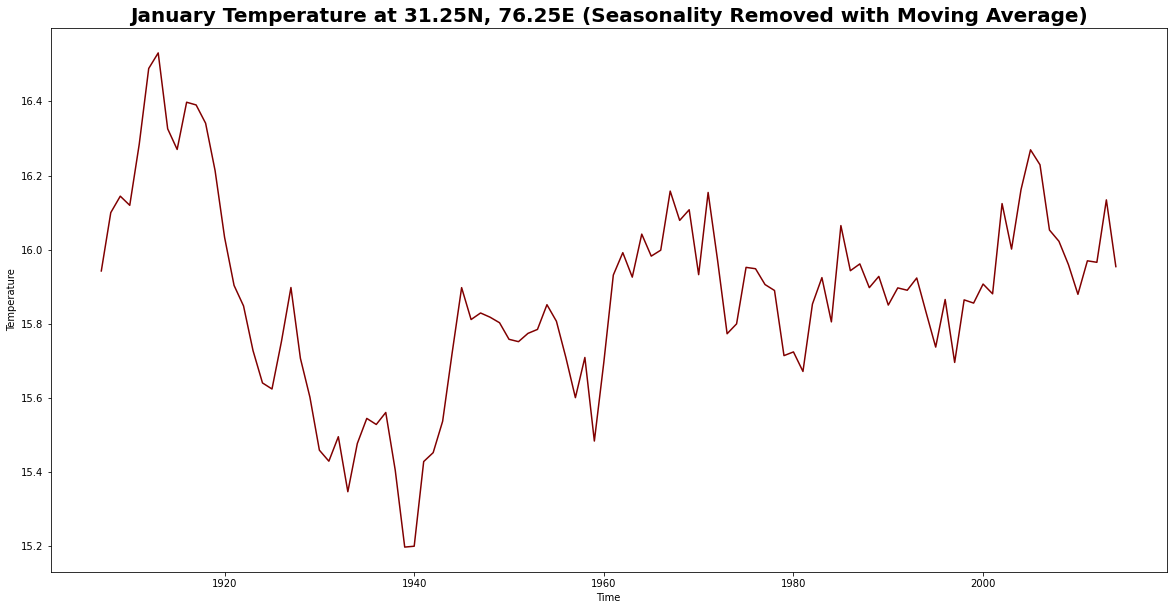

In [13]:
# getting rid of seasonality in the data
# Get the January data
january_data = tasmax_location.sel(time=tasmax_location.time.dt.month==1)

# Define the window size for the rolling average (in units of months)
window_size = 12

# Calculate the rolling average
rolling_avg = january_data.temp.rolling(time=window_size, center=True).mean()

# Plot the rolling average data
plt.close('all')
plt.figure(figsize=(20,10))
plt.plot(january_data.time, rolling_avg, 'maroon')
plt.title('January Temperature at 31.25N, 76.25E (Seasonality Removed with Moving Average)', fontsize=20, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()


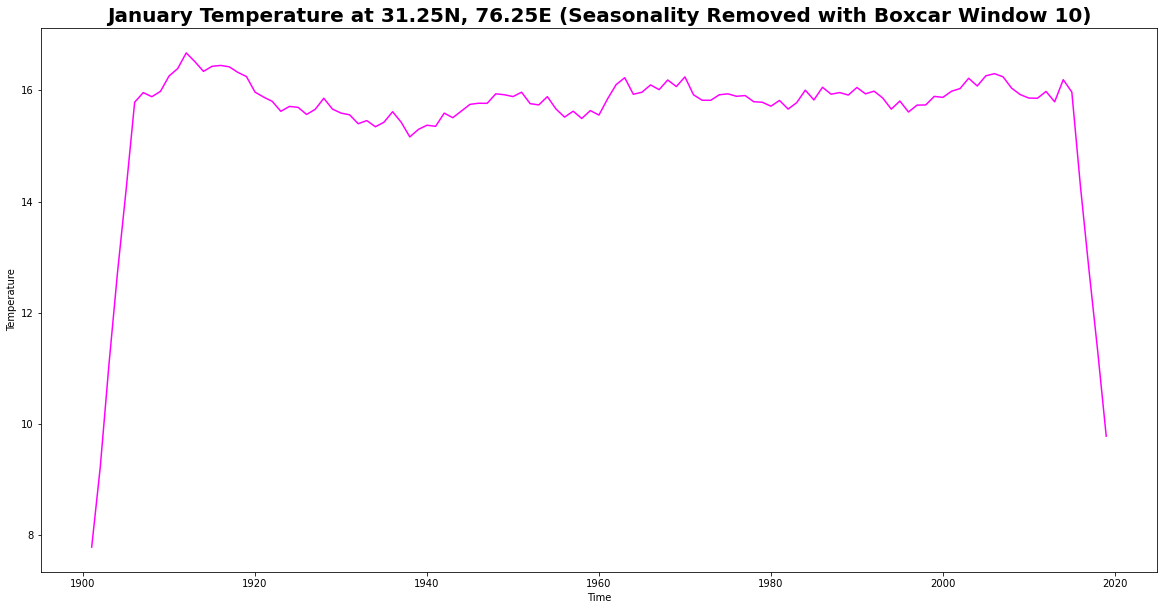

In [14]:
# Get the January data
january_data = tasmax_location.sel(time=tasmax_location.time.dt.month==1)

# Define the boxcar window size
window_size = 10

# Define the boxcar window function
boxcar = np.ones(window_size) / window_size

# Convolve the data with the boxcar window
smoothed_data = np.convolve(january_data.temp, boxcar, mode='same')

# Plot the smoothed data
plt.close('all')
plt.figure(figsize=(20,10))
plt.plot(january_data.time, smoothed_data, 'magenta')
plt.title(f'January Temperature at 31.25N, 76.25E (Seasonality Removed with Boxcar Window {window_size})', fontsize=20, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

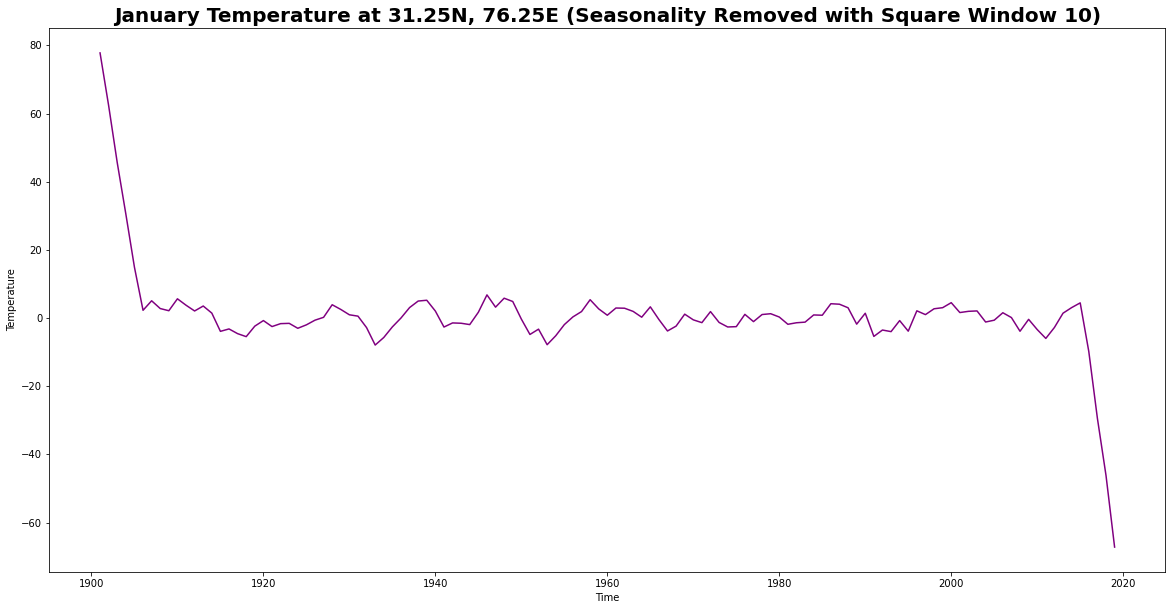

In [15]:
# Get the January data
january_data = tasmax_location.sel(time=tasmax_location.time.dt.month==1)

# Define the square window size
window_size = 10

# Define the square window function
square = np.zeros(window_size)
square[:window_size//2] = 1
square[window_size//2:] = -1

# Convolve the data with the square window
smoothed_data = np.convolve(january_data.temp, square, mode='same')

# Plot the smoothed data
plt.close('all')
plt.figure(figsize=(20,10))
plt.plot(january_data.time, smoothed_data, 'purple')
plt.title(f'January Temperature at 31.25N, 76.25E (Seasonality Removed with Square Window {window_size})', fontsize=20, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

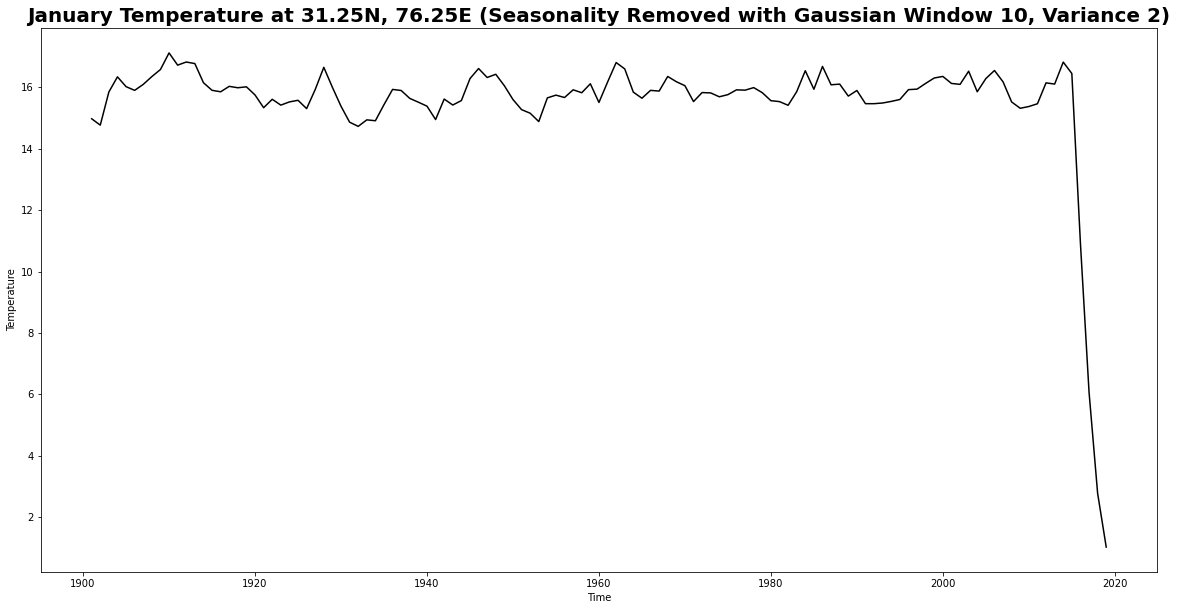

In [16]:
# Get the January data
january_data = tasmax_location.sel(time=tasmax_location.time.dt.month==1)

# Define the Gaussian window size and variance
window_size = 10
variance = 2

# Define the Gaussian window function
gaussian = np.exp(-np.arange(window_size)**2/(2*variance**2))

# Normalize the Gaussian window function
gaussian /= np.sum(gaussian)

# Convolve the data with the Gaussian window
smoothed_data = np.convolve(january_data.temp, gaussian, mode='same')

# Plot the smoothed data
plt.close('all')
plt.figure(figsize=(20,10))
plt.plot(january_data.time, smoothed_data, 'black')
plt.title(f'January Temperature at 31.25N, 76.25E (Seasonality Removed with Gaussian Window {window_size}, Variance {variance})', fontsize=20, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

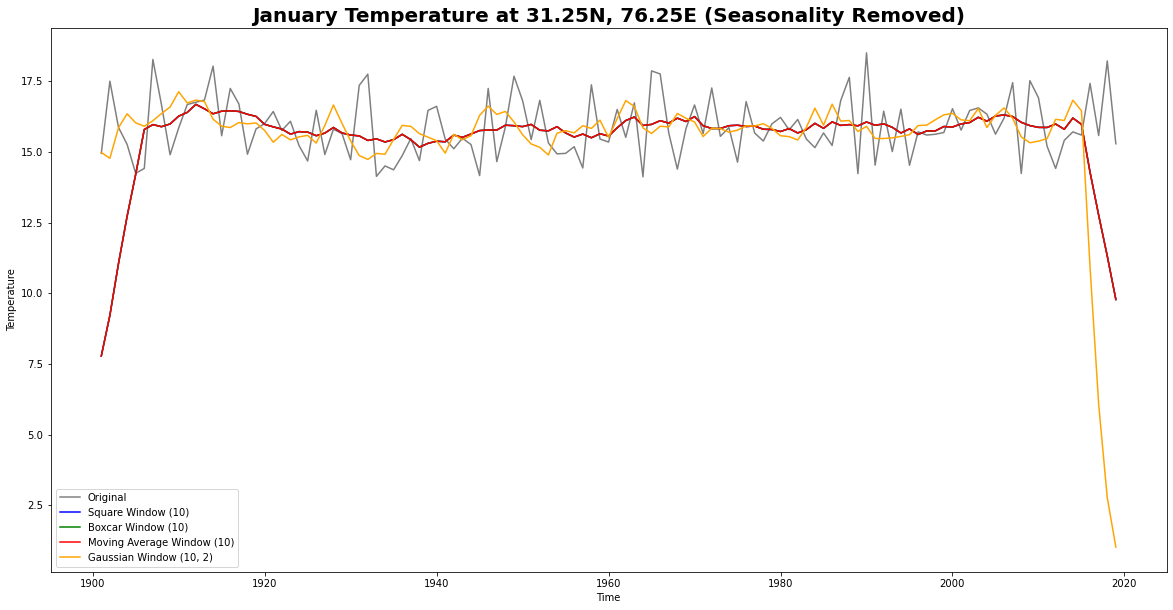

In [17]:
# Get the January data
january_data = tasmax_location.sel(time=tasmax_location.time.dt.month==1)

# Define the square window size
square_size = 10

# Define the moving average window size
ma_size = 10

# define the boxcar window function
window_size = 10
boxcar = np.ones(window_size) / window_size

# Define the Gaussian window size and variance
gaussian_size = 10
gaussian_variance = 2

# Define the square window function
square = np.ones(square_size)/square_size

# Define the moving average window function
ma = np.ones(ma_size)/ma_size

# Define the Gaussian window function
gaussian = np.exp(-np.arange(gaussian_size)**2/(2*gaussian_variance**2))
gaussian /= np.sum(gaussian)

# Convolve the data with the window functions
square_smoothed = np.convolve(january_data.temp, square, mode='same')
ma_smoothed = np.convolve(january_data.temp, ma, mode='same')
boxcar_smoothed = np.convolve(january_data.temp, boxcar, mode='same')
gaussian_smoothed = np.convolve(january_data.temp, gaussian, mode='same')

# Plot the smoothed data
plt.close('all')
plt.figure(figsize=(20,10))
plt.plot(january_data.time, january_data.temp, 'k', alpha=0.5, label='Original')
plt.plot(january_data.time, square_smoothed, 'b', label=f'Square Window ({square_size})')
plt.plot(january_data.time, boxcar_smoothed, 'g', label=f'Boxcar Window ({window_size})')
plt.plot(january_data.time, ma_smoothed, 'r', label=f'Moving Average Window ({ma_size})')
plt.plot(january_data.time, gaussian_smoothed, 'orange', label=f'Gaussian Window ({gaussian_size}, {gaussian_variance})')
plt.title('January Temperature at 31.25N, 76.25E (Seasonality Removed)', fontsize=20, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [18]:
# fitting an arima model to the data
# Get the January data
january_data = tasmax_location.sel(time=tasmax_location.time.dt.month==1)

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(january_data.temp, order=(2,1,1))

results = model.fit()

print(results.summary())

# Plot the residuals
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(january_data, label='Original')
ax.plot(results.fittedvalues, label='ARIMA model')
ax.legend()
ax.set_title('ARIMA model fit to January Temperature at 31.25N, 76.25E', fontsize=20, fontweight='bold')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
plt.show()

ImportError: cannot import name 'Int64Index' from 'pandas' (c:\Users\Alli Ajagbe\anaconda3\lib\site-packages\pandas\__init__.py)